In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("Global_Power_Plant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.shape

(908, 25)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

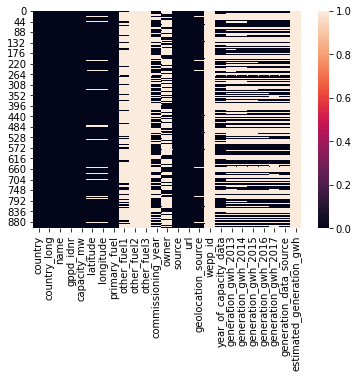

In [6]:
sn.heatmap(df.isnull())

Lots of missing value so creating a new dataset with the columns which have good numbers of values

In [39]:
df1=df[['name','gppd_idnr','capacity_mw','latitude','longitude','primary_fuel','source','url','geolocation_source']].copy()

In [40]:
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


In [41]:
df1.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

# Replacing missing values

In [51]:
df1.dropna(axis=0,inplace=True)

In [52]:
df1.isnull().sum()

name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [53]:
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


# Visualization

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

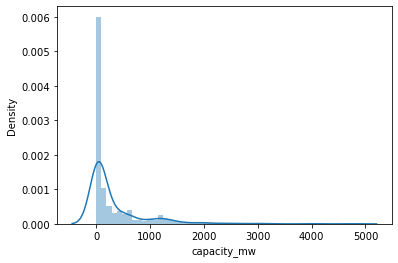

In [27]:
sn.distplot(df1['capacity_mw'], kde=True)

<AxesSubplot:xlabel='latitude', ylabel='Density'>

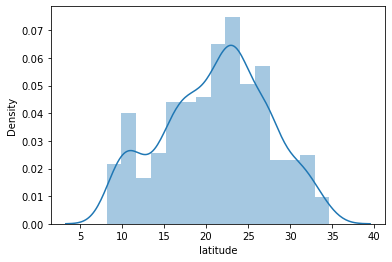

In [54]:
sn.distplot(df1['latitude'], kde=True)

<AxesSubplot:xlabel='longitude', ylabel='Density'>

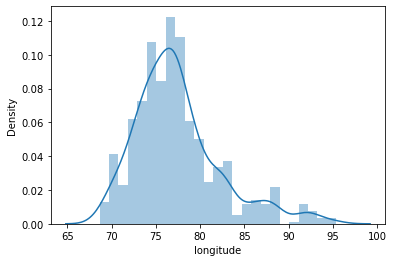

In [55]:
sn.distplot(df1['longitude'], kde=True)

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


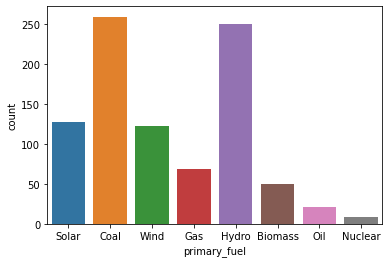

In [15]:
ax = sn.countplot(x="primary_fuel", data=df)
print(df["primary_fuel"].value_counts())

Coal and Hydro is used in most of the company for primary fuel

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Jai Industries ltd                             1
Sterling and Wilson                            1
Precision Technik Private Limited              1
Konark Gujarat Private Limited                 1
Ideal Projects ltd                             1
Name: source, Length: 191, dtype: int64


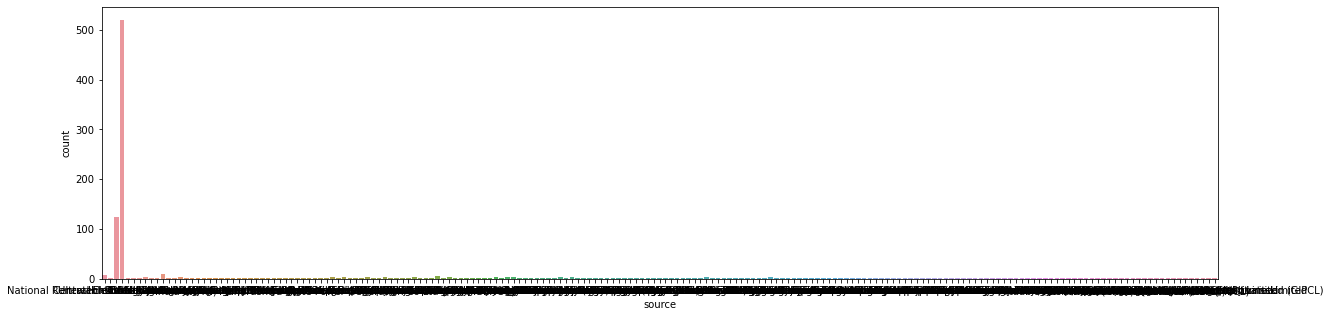

In [16]:
plt.figure(figsize = (20,5))
ax = sn.countplot(x="source", data=df)
print(df["source"].value_counts())

Most of the cases the source of data is Central Electricity Authority

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.welspunrenewables.com                                                      4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/BVQI1312546277.77/view                             1
http://www.bloomberg.com/profiles/companies/4115076Z:IN-varam-bio-energy-pvt-ltd      1
https://cdm.unfccc.int/Projects/DB/RWTUV1323884772.8/view                             1
https://www.iocl.com                                                                  1
https://cdm.unfccc.int/Projects/DB/BVQI1315830379.2/view                              1
Name: url, Length: 304, dtype: i

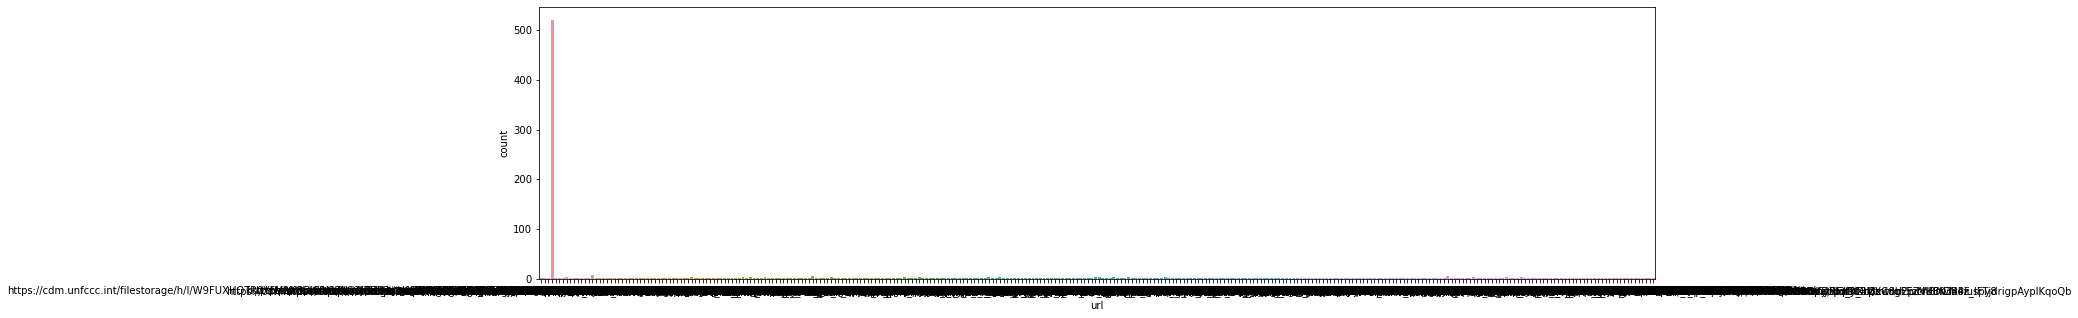

In [17]:
plt.figure(figsize = (20,5))
ax = sn.countplot(x="url", data=df)
print(df["url"].value_counts())

Most of the cases the  data sorced from http://www.cea.nic.in/   

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


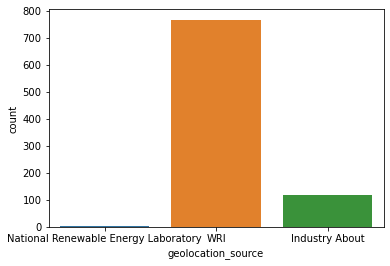

In [18]:

ax = sn.countplot(x="geolocation_source", data=df)
print(df["geolocation_source"].value_counts())

Most geo_location sorces are WRI

# Checking Outlier

<AxesSubplot:>

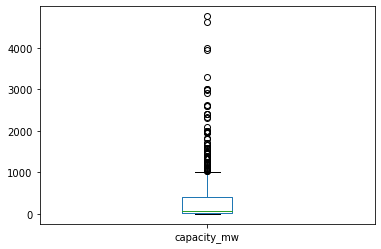

In [56]:
df1["capacity_mw"].plot.box()

<AxesSubplot:>

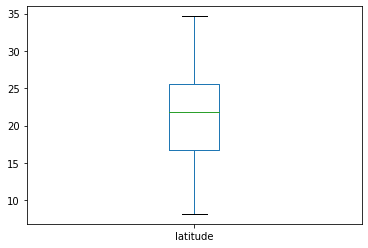

In [57]:
df1["latitude"].plot.box()

<AxesSubplot:>

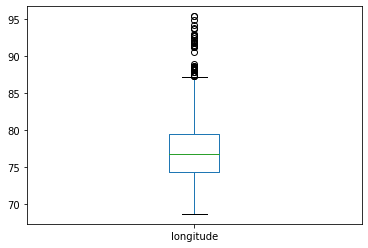

In [58]:
df1["longitude"].plot.box()

# Encoding data

In [63]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['name']=lb.fit_transform(df1['name'])
df1['gppd_idnr']=lb.fit_transform(df1['gppd_idnr'])
df1['primary_fuel']=lb.fit_transform(df1['primary_fuel'])
df1['source']=lb.fit_transform(df1['source'])
df1['url']=lb.fit_transform(df1['url'])
df1['geolocation_source']=lb.fit_transform(df1['geolocation_source'])

In [64]:
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,630,2.5,28.1839,73.2407,6,109,126,1
1,1,493,98.0,24.7663,74.6090,1,174,169,2
2,2,819,39.2,21.9038,69.3732,7,21,196,2
3,3,0,135.0,23.8712,91.3602,2,22,58,2
4,4,1,1800.0,21.9603,82.4091,1,22,58,2
...,...,...,...,...,...,...,...,...,...
903,857,471,1600.0,16.2949,77.3568,1,22,58,2
904,858,788,3.0,12.8932,78.1654,6,77,22,0
905,859,847,25.5,15.2758,75.5811,7,21,246,2
906,860,513,80.0,24.3500,73.7477,1,59,82,2


# Handling Outlier

In [66]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([ 14,  67, 138, 173, 177, 185, 235, 289, 298, 311, 313, 320, 327,
        347, 350, 351, 362, 402, 411, 431, 460, 470, 471, 476, 495, 611,
        621, 629, 633, 641, 659, 665, 693, 744, 746, 766, 776, 789, 836,
        837, 850, 855], dtype=int64),
 array([2, 6, 2, 4, 4, 6, 4, 6, 2, 6, 4, 4, 4, 4, 2, 2, 2, 4, 4, 7, 2, 2,
        2, 4, 4, 4, 2, 2, 6, 6, 6, 2, 2, 2, 2, 2, 4, 6, 6, 2, 6, 6],
       dtype=int64))

In [67]:
df1=df1[(z<3).all(axis=1)]
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,630,2.5,28.1839,73.2407,6,109,126,1
1,1,493,98.0,24.7663,74.6090,1,174,169,2
2,2,819,39.2,21.9038,69.3732,7,21,196,2
3,3,0,135.0,23.8712,91.3602,2,22,58,2
4,4,1,1800.0,21.9603,82.4091,1,22,58,2
...,...,...,...,...,...,...,...,...,...
903,857,471,1600.0,16.2949,77.3568,1,22,58,2
904,858,788,3.0,12.8932,78.1654,6,77,22,0
905,859,847,25.5,15.2758,75.5811,7,21,246,2
906,860,513,80.0,24.3500,73.7477,1,59,82,2


In [68]:
df1.skew()

name                  0.004776
gppd_idnr            -0.018379
capacity_mw           1.947447
latitude             -0.114423
longitude             0.932590
primary_fuel          0.477293
source                1.779954
url                   1.486376
geolocation_source   -2.075808
dtype: float64

In [69]:
df1.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,427.886585,432.909756,285.918489,21.118795,77.157116,3.192683,43.375610,91.702439,1.719512
std,249.568767,250.284193,442.268283,6.335039,4.498334,2.276266,43.178737,65.950859,0.691381
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000
25%,210.750000,217.750000,18.000000,16.624700,74.227575,1.000000,22.000000,58.000000,2.000000
50%,428.500000,435.500000,60.000000,21.630200,76.639500,3.000000,22.000000,58.000000,2.000000
75%,644.250000,650.250000,391.000000,25.524875,79.178200,6.000000,34.250000,111.250000,2.000000
max,861.000000,861.000000,2100.000000,34.649000,91.981000,7.000000,180.000000,286.000000,2.000000


# Correlation of the columns with the target columns

In [71]:
df1.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
name,1.000000,0.322710,0.046841,-0.148664,0.029338,0.030516,-0.023113,0.027510,0.042719
gppd_idnr,0.322710,1.000000,-0.404585,-0.102820,-0.397314,0.604351,0.419724,0.582743,-0.475813
capacity_mw,0.046841,-0.404585,1.000000,0.050587,0.255747,-0.405465,-0.280361,-0.271776,0.244410
latitude,-0.148664,-0.102820,0.050587,1.000000,-0.002380,-0.016948,0.069369,-0.134165,-0.189286
longitude,0.029338,-0.397314,0.255747,-0.002380,1.000000,-0.396161,-0.247970,-0.322252,0.275287
primary_fuel,0.030516,0.604351,-0.405465,-0.016948,-0.396161,1.000000,0.057365,0.577139,-0.500951
source,-0.023113,0.419724,-0.280361,0.069369,-0.247970,0.057365,1.000000,0.172359,-0.507723
url,0.027510,0.582743,-0.271776,-0.134165,-0.322252,0.577139,0.172359,1.000000,-0.016507
geolocation_source,0.042719,-0.475813,0.244410,-0.189286,0.275287,-0.500951,-0.507723,-0.016507,1.000000


<AxesSubplot:>

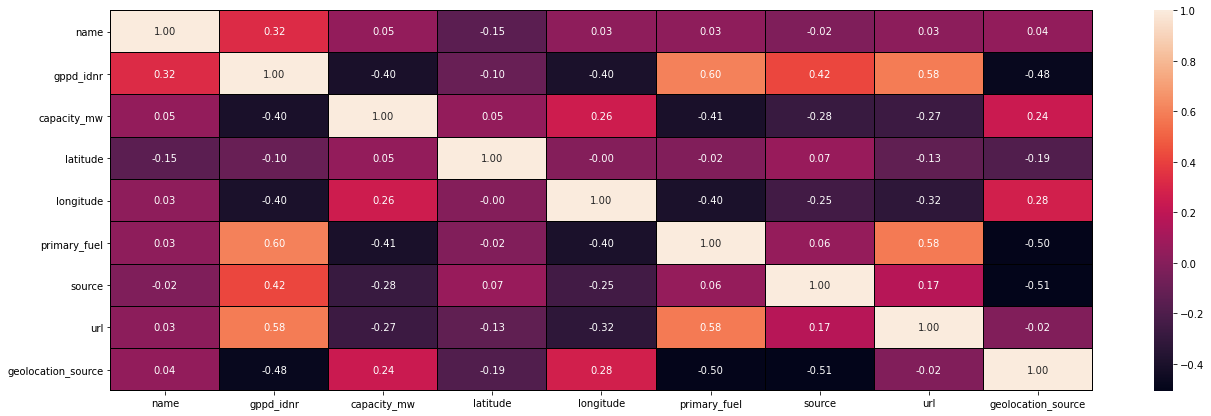

In [72]:
plt.figure(figsize=(22,7))
sn.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

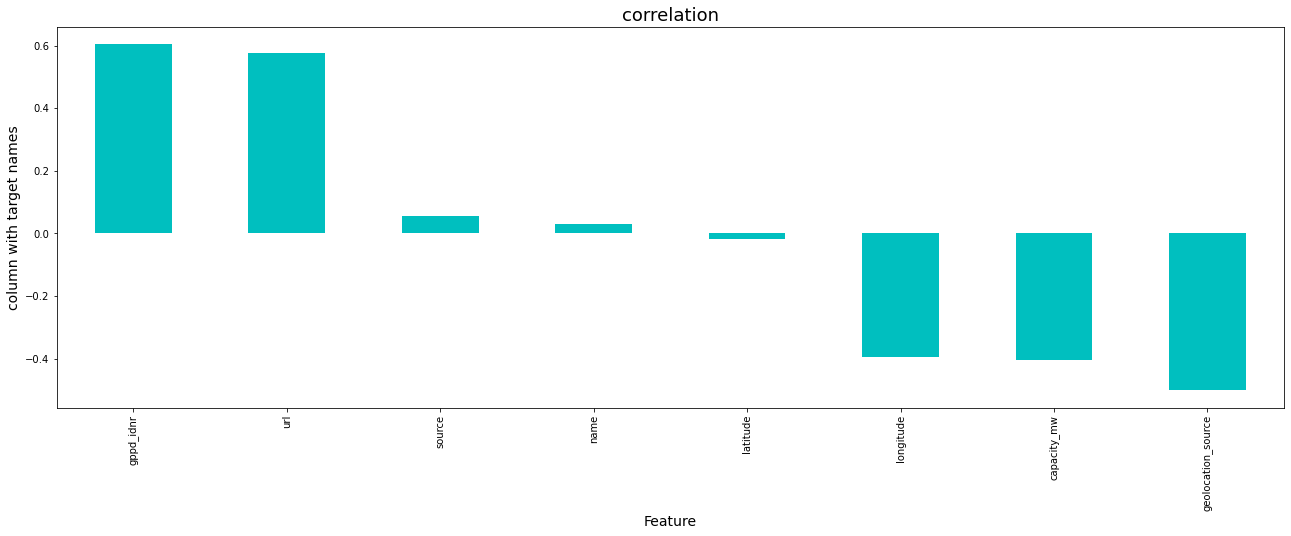

In [73]:
plt.figure(figsize=(22,7))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

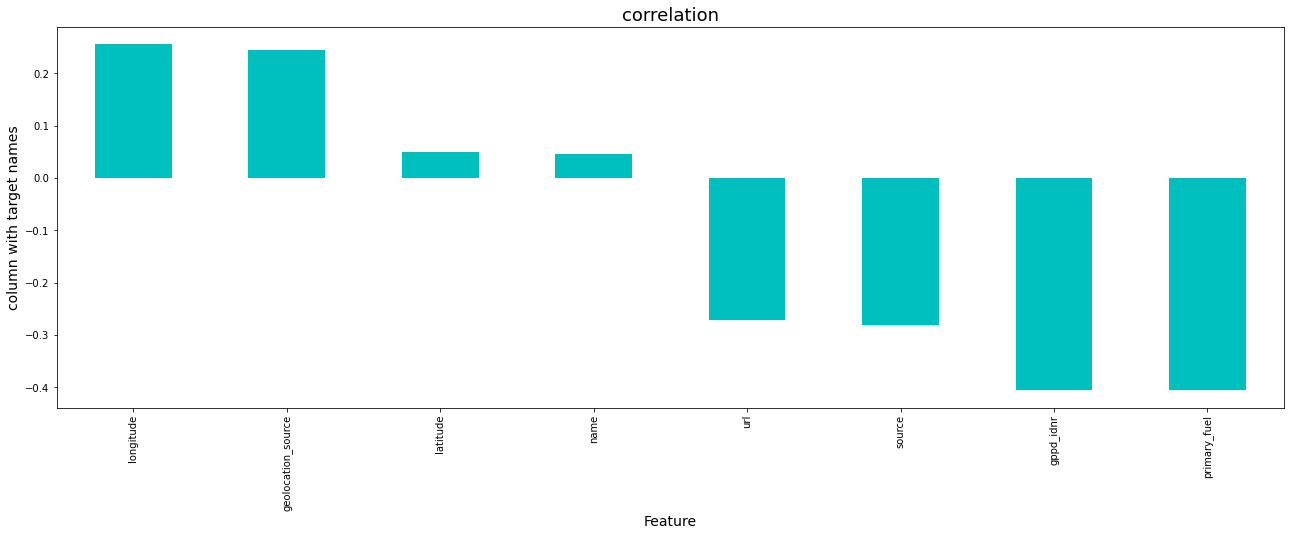

In [74]:
plt.figure(figsize=(22,7))
df1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [76]:
x=df1.drop(['primary_fuel'],axis=1)
x

,name,gppd_idnr,capacity_mw,latitude,longitude,source,url,geolocation_source
0,0,630,2.5,28.1839,73.2407,109,126,1
1,1,493,98.0,24.7663,74.6090,174,169,2
2,2,819,39.2,21.9038,69.3732,21,196,2
3,3,0,135.0,23.8712,91.3602,22,58,2
4,4,1,1800.0,21.9603,82.4091,22,58,2
...,...,...,...,...,...,...,...,...
903,857,471,1600.0,16.2949,77.3568,22,58,2
904,858,788,3.0,12.8932,78.1654,77,22,0
905,859,847,25.5,15.2758,75.5811,21,246,2
906,860,513,80.0,24.3500,73.7477,59,82,2


In [78]:
y=df1.iloc[:,5]
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 820, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.71555013,  0.78794641, -0.64122044, ...,  1.52075875,
         0.52036462, -1.04132421],
       [-1.71154077,  0.24023458, -0.42515637, ...,  3.02704808,
         1.17276315,  0.40593995],
       [-1.70753141,  1.54354886, -0.55818849, ..., -0.51852526,
         1.58240874,  0.40593995],
       ...,
       [ 1.72848764,  1.65548996, -0.58918407, ..., -0.51852526,
         2.34101169,  0.40593995],
       [ 1.732497  ,  0.32019251, -0.46588049, ...,  0.36207465,
        -0.14720598,  0.40593995],
       [ 1.73650635,  1.59552151, -0.60954613, ..., -0.51852526,
         2.15894698,  0.40593995]])

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
lg=LogisticRegression()

In [82]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7667682926829268
At random state 0,the testing accuracy is:- 0.7621951219512195


At random state 1,the training accuracy is:- 0.7515243902439024
At random state 1,the testing accuracy is:- 0.8109756097560976


At random state 2,the training accuracy is:- 0.7560975609756098
At random state 2,the testing accuracy is:- 0.7804878048780488


At random state 3,the training accuracy is:- 0.7682926829268293
At random state 3,the testing accuracy is:- 0.7317073170731707


At random state 4,the training accuracy is:- 0.7637195121951219
At random state 4,the testing accuracy is:- 0.7804878048780488


At random state 5,the training accuracy is:- 0.7621951219512195
At random state 5,the testing accuracy is:- 0.7804878048780488


At random state 6,the training accuracy is:- 0.7713414634146342
At random state 6,the testing accuracy is:- 0.7682926829268293


At random state 7,the training accuracy is:- 0.7530487804878049
At random state 7,the testing acc

At random state 66,the training accuracy is:- 0.7728658536585366
At random state 66,the testing accuracy is:- 0.75


At random state 67,the training accuracy is:- 0.7667682926829268
At random state 67,the testing accuracy is:- 0.7682926829268293


At random state 68,the training accuracy is:- 0.7667682926829268
At random state 68,the testing accuracy is:- 0.7378048780487805


At random state 69,the training accuracy is:- 0.7560975609756098
At random state 69,the testing accuracy is:- 0.7987804878048781


At random state 70,the training accuracy is:- 0.7591463414634146
At random state 70,the testing accuracy is:- 0.7987804878048781


At random state 71,the training accuracy is:- 0.7713414634146342
At random state 71,the testing accuracy is:- 0.7621951219512195


At random state 72,the training accuracy is:- 0.7667682926829268
At random state 72,the testing accuracy is:- 0.7560975609756098


At random state 73,the training accuracy is:- 0.7698170731707317
At random state 73,the testing a

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=79)

In [84]:
x_train.shape

(549, 8)

In [85]:
x_test.shape

(271, 8)

In [86]:
y_train.shape

(549,)

In [87]:
y_test.shape

(271,)

In [88]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7712177121771218
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.77      0.73      0.75        81
           2       0.00      0.00      0.00        22
           3       0.66      0.91      0.77        77
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        39
           7       0.94      1.00      0.97        32

    accuracy                           0.77       271
   macro avg       0.50      0.55      0.52       271
weighted avg       0.70      0.77      0.73       271



In [89]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7675276752767528
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.71      0.75      0.73        81
           2       0.39      0.32      0.35        22
           3       0.78      0.75      0.77        77
           4       0.00      0.00      0.00         2
           5       0.29      0.33      0.31         6
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        32

    accuracy                           0.77       271
   macro avg       0.62      0.62      0.62       271
weighted avg       0.77      0.77      0.77       271



In [90]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8302583025830258
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.78      0.85      0.81        81
           2       0.50      0.27      0.35        22
           3       0.83      0.88      0.86        77
           4       0.00      0.00      0.00         2
           5       0.20      0.17      0.18         6
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        32

    accuracy                           0.83       271
   macro avg       0.64      0.63      0.63       271
weighted avg       0.81      0.83      0.82       271



In [91]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7785977859778598
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.72      0.78      0.75        81
           2       0.00      0.00      0.00        22
           3       0.73      0.91      0.81        77
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.98        32

    accuracy                           0.78       271
   macro avg       0.49      0.53      0.51       271
weighted avg       0.70      0.78      0.74       271



In [92]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7416974169741697
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.73      0.68      0.71        81
           2       0.27      0.18      0.22        22
           3       0.70      0.81      0.75        77
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        39
           7       0.94      1.00      0.97        32

    accuracy                           0.74       271
   macro avg       0.52      0.55      0.53       271
weighted avg       0.72      0.74      0.73       271



# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [96]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.7585365853658537


In [95]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7682926829268293


In [97]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.828048780487805


In [98]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7707317073170732


In [99]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.7634146341463415


# AUC ROC Curve

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [101]:
y_pred_prob=.predict_proba(x_test)
y_pred_prob

array([[0.01, 0.18, 0.52, ..., 0.08, 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.02, 0.09, ..., 0.02, 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.68, 0.  , ..., 0.  , 0.  , 0.  ]])

In [103]:
y_pred_prob.shape

(271, 8)

In [104]:
auc_score=roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')

In [105]:
auc_score

0.9037022435480527

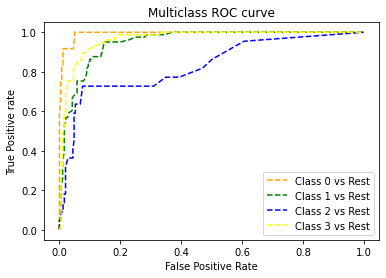

In [108]:
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# Hyper Parameter Tuning

In [110]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,None],'criterion':{'gini', 'entropy'},'min_samples_split': [2, 5, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [113]:
rf=RandomForestClassifier(n_estimators=200,max_depth=80,criterion='gini',min_samples_split=5)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8228782287822878
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.75      0.84      0.79        81
           2       0.55      0.27      0.36        22
           3       0.82      0.87      0.84        77
           4       0.00      0.00      0.00         2
           5       0.25      0.17      0.20         6
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        32

    accuracy                           0.82       271
   macro avg       0.65      0.62      0.63       271
weighted avg       0.80      0.82      0.81       271



# Regression

In [114]:
x=df1.drop(['capacity_mw'],axis=1)
x

,name,gppd_idnr,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,630,28.1839,73.2407,6,109,126,1
1,1,493,24.7663,74.6090,1,174,169,2
2,2,819,21.9038,69.3732,7,21,196,2
3,3,0,23.8712,91.3602,2,22,58,2
4,4,1,21.9603,82.4091,1,22,58,2
...,...,...,...,...,...,...,...,...
903,857,471,16.2949,77.3568,1,22,58,2
904,858,788,12.8932,78.1654,6,77,22,0
905,859,847,15.2758,75.5811,7,21,246,2
906,860,513,24.3500,73.7477,1,59,82,2


In [115]:
y=df1.iloc[:,2]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 820, dtype: float64

In [116]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.71555013,  0.78794641,  1.11592323, ...,  1.52075875,
         0.52036462, -1.04132421],
       [-1.71154077,  0.24023458,  0.57611823, ...,  3.02704808,
         1.17276315,  0.40593995],
       [-1.70753141,  1.54354886,  0.12399047, ..., -0.51852526,
         1.58240874,  0.40593995],
       ...,
       [ 1.72848764,  1.65548996, -0.9228926 , ..., -0.51852526,
         2.34101169,  0.40593995],
       [ 1.732497  ,  0.32019251,  0.51036424, ...,  0.36207465,
        -0.14720598,  0.40593995],
       [ 1.73650635,  1.59552151, -1.76655905, ..., -0.51852526,
         2.15894698,  0.40593995]])

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=79)

In [118]:
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [120]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred))
print('Mean Sqared error',mean_squared_error(y_test,pred))

0.2812897324102356
Mean absolute error 277.82077322426375
Mean Sqared error 140090.65453625334


In [121]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.2812897324102356
Mean absolute error 224.4214243542435
Mean Sqared error 147320.2009074391


In [122]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred1=rfr.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.2812897324102356
Mean absolute error 182.4024951291513
Mean Sqared error 98468.93908599077


In [123]:
sv=SVR()
sv.fit(x_train,y_train)
pred1=sv.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.2812897324102356
Mean absolute error 251.205376671454
Mean Sqared error 227726.2986796971


In [124]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.26917922040007414


In [125]:
print(cross_val_score(dt,x,y,cv=5).mean())

-0.08078889105122404


In [126]:
print(cross_val_score(rfr,x,y,cv=5).mean())

0.4390053952033222


In [127]:
print(cross_val_score(sv,x,y,cv=5).mean())

-0.17657987071830292


# Regulization

In [128]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [129]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
gv = GridSearchCV(ls,parameters)
gv.fit(x_train,y_train)

print(gv.best_params_)

{'alpha': 1, 'random_state': 0}


In [130]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
Model=r2_score(y_test,pred_ls)
print(Model)

0.2812965402971449


# Saving Model

In [135]:
import pickle
filename = 'Global_Plant_Classifier.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [136]:

filename = 'Global_Plant_Regressor.pkl'
pickle.dump(Model, open(filename, 'wb'))